# **K-Means Clustring**

In [98]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [99]:
df = pd.read_csv('./data/student_clustering.csv')
print("The shape of data is",df.shape)
df.head()

The shape of data is (200, 2)


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


### **Find Number of Clusters**

In [100]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

In [101]:
wcss

[29957.898288,
 4184.14127,
 2364.005583420083,
 681.96966,
 556.6603823704867,
 473.266580491814,
 346.68913350290234,
 242.2546177798125,
 229.50466124399313,
 235.2758499214512]

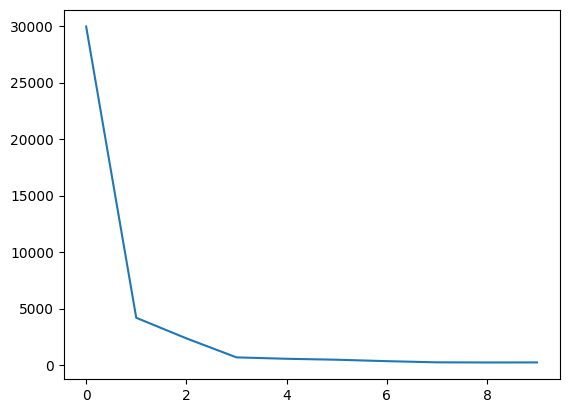

In [102]:
import matplotlib.pyplot as plt
plt.plot(wcss);

### **Pridict the Clusters**

In [103]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=4,random_state=42)
y_means = km.fit_predict(X)

In [104]:
y_means

array([1, 0, 2, 2, 0, 0, 2, 3, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 1,
       2, 1, 1, 2, 1, 3, 2, 0, 3, 0, 3, 0, 2, 2, 3, 0, 1, 0, 1, 2, 2, 1,
       3, 3, 2, 0, 3, 0, 1, 1, 3, 2, 3, 0, 0, 3, 0, 3, 0, 2, 2, 3, 1, 3,
       2, 1, 0, 2, 0, 3, 2, 1, 0, 3, 0, 3, 1, 2, 2, 3, 0, 1, 3, 1, 3, 0,
       3, 0, 3, 3, 2, 1, 2, 2, 3, 2, 1, 3, 0, 1, 1, 3, 1, 1, 2, 1, 3, 3,
       2, 3, 0, 0, 2, 3, 2, 0, 3, 1, 1, 0, 2, 3, 2, 1, 2, 0, 1, 2, 2, 0,
       1, 1, 0, 3, 0, 1, 2, 2, 2, 1, 0, 1, 1, 3, 1, 3, 0, 1, 3, 1, 3, 3,
       1, 2, 0, 3, 0, 2, 1, 3, 0, 2, 3, 1, 0, 1, 1, 3, 3, 0, 3, 1, 1, 2,
       3, 0, 1, 3, 3, 0, 0, 0, 2, 1, 2, 2, 3, 0, 2, 2, 1, 1, 2, 1, 3, 0,
       0, 3])

In [105]:
X[y_means==3,0]

array([8.8 , 9.18, 8.86, 8.83, 8.56, 8.96, 8.78, 8.45, 8.79, 8.81, 8.88,
       9.07, 8.92, 8.75, 8.71, 8.86, 9.3 , 9.01, 8.97, 9.  , 8.76, 8.78,
       9.23, 9.03, 9.13, 8.91, 8.98, 9.03, 8.86, 8.89, 8.97, 8.72, 8.93,
       8.58, 8.94, 8.6 , 8.77, 8.81, 8.54, 8.97, 8.91, 8.68, 9.06, 8.9 ,
       8.94, 8.91, 8.91, 8.95, 8.57, 8.82])

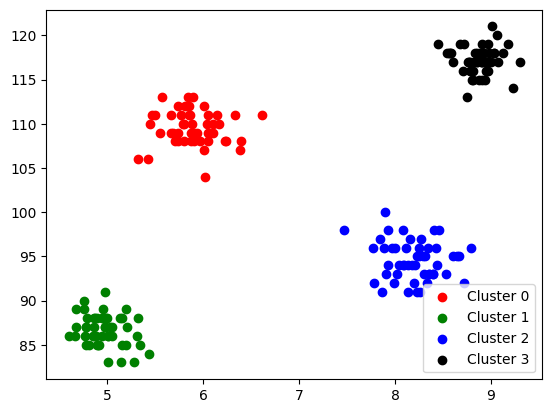

In [106]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],color='red')
plt.scatter(X[y_means==1,0],X[y_means==1,1],color='green')
plt.scatter(X[y_means==2,0],X[y_means==2,1],color='blue')
plt.scatter(X[y_means==3,0],X[y_means==3,1],color='black')
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']);

## **K-Means on 3-D Data**

In [107]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [108]:
X[0:11,:]

array([[ 4.33424548,  3.32580419, -4.17497018],
       [-3.32246719,  3.22171129, -4.625342  ],
       [-6.07296862, -4.13459237,  2.6984613 ],
       [ 6.90465871,  6.1110567 , -4.3409502 ],
       [-2.60839207,  2.95015551, -2.2346649 ],
       [ 5.88490881,  4.12271848, -5.86778722],
       [-4.68484061, -4.15383935,  4.14048406],
       [-1.82542929,  3.96089238, -3.4075272 ],
       [-5.34385368, -4.95640314,  4.37999916],
       [ 4.91549197,  4.70263812, -4.582698  ],
       [-3.80108212, -4.81484358,  4.62471505]])

In [109]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [110]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

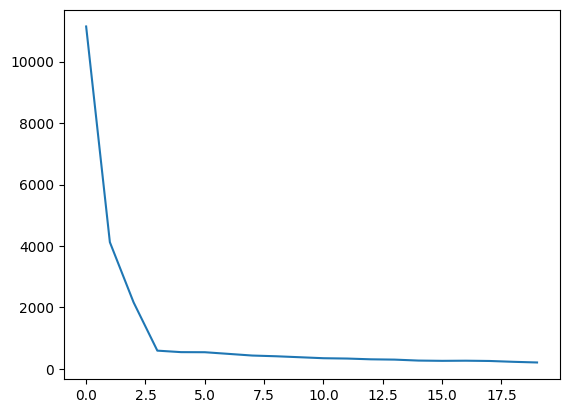

In [111]:
plt.plot(wcss)

In [114]:
km = KMeans(n_clusters=4)
y_pred =km.fit_predict(X)

In [115]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [116]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()